# Short Tutorial

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

In [1]:
NAME = "Alexander Tashchyan"

---

# Some Tasks on Quantitative Finance
## Spring 2021

The tasks were provided by ICEF HSE course in Quantitative Finance in 2021
Thanks for the tasks to V. Lapshin

# Problem 1


## Part 1.1 (2 points)
Choose and implement another pseudo-random number generator to sample from the uniform distribution over $[0,\,1]$. The points do not depend on the type of generator. Choose it to adjust the difficulty:
1. Another LCG  -- easy
2. Another type of generator -- medium

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def set_seed(seed):
    global _rand_global_prev
    _rand_global_prev = seed
    return _rand_global_prev 

In [4]:
def pseudo_random_number_generator():
    global _rand_global_prev
    a = 16807
    b = 0
    m = 2**31-1
    _rand_global_prev = ((_rand_global_prev*a + b) % m)
    return _rand_global_prev/m

**You should below describe the algorithm of the pseudo random number generator you use**

Linear congruential generators (LCGs) are a class of pseudorandom number generator (PRNG) algorithms used for generating sequences of random-like numbers.

Linear congruential generators are defined by a recurrence relation:

$X_{i+1} = (aX_{i} + c) * mod(m)$

To create uniform 0,1 we need also to divide the result $X_{i} $  by m

In [5]:
set_seed(1234)
print(pseudo_random_number_generator())
print([pseudo_random_number_generator() for _ in range(7)])

0.009657739666131204
[0.3176305686671429, 0.41696758867100236, 0.9742627935364203, 0.4347709666168182, 0.19563592886348996, 0.05305640867587943, 0.7190606155055858]


In [6]:
# Check that seed works

set_seed(1234)
VALUE_1 = pseudo_random_number_generator()
set_seed(4321)
VALUE_2 = pseudo_random_number_generator()
set_seed(1234)
VALUE_1_NEW = pseudo_random_number_generator()

assert np.abs(VALUE_1 - VALUE_1_NEW) < 1e-08
assert np.abs(VALUE_2 - VALUE_1) > 1e-08

## Part 1.2 (2 points)
Show that your generator works -- perform at least 2 statistical tests. Choose the tests to adjust the difficulty:
1. $\chi^2$ test for the distribution and the standard test for autocorrelation -- easy (we did those)
2. Test the distribution and autocorrelation via other statistical tests -- medium
3. Choose other tests and implement them -- advanced

Don't forget to document what you're doing

**Remember that you can add your cells in order to make functions below more clear. Please describe the tests you use 
in the form below**

### Chi-Squared test

Chi-Square goodness of fit test is a non-parametric test that is used to find out how the observed value of a given phenomena is significantly different from the expected value.  In Chi-Square goodness of fit test, the term goodness of fit is used to compare the observed sample distribution with the expected probability distribution.  Chi-Square goodness of fit test determines how well theoretical distribution (such as normal, binomial, or Poisson) fits the empirical distribution. In Chi-Square goodness of fit test, sample data is divided into intervals. Then the numbers of points that fall into the interval are compared, with the expected numbers of points in each interval.

A. Null hypothesis: In Chi-Square goodness of fit test, the null hypothesis assumes that there is no significant difference between the observed and the expected value.

B. Alternative hypothesis: In Chi-Square goodness of fit test, the alternative hypothesis assumes that there is a significant difference between the observed and the expected value.

Hypothesis testing in Chi-Square goodness of fit test is the same as in other tests, like t-test, ANOVA, etc.  The calculated value of Chi-Square goodness of fit test is compared with the table value.  If the calculated value of Chi-Square goodness of fit test is greater than the table value, we will reject the null hypothesis and conclude that there is a significant difference between the observed and the expected frequency.  If the calculated value of Chi-Square goodness of fit test is less than the table value, we will accept the null hypothesis and conclude that there is no significant difference between the observed and expected value.

In [7]:
import scipy.stats as stats

In [8]:
set_seed(42)
SEQUENCE_TEST = [pseudo_random_number_generator() for _ in range(1000)]

In [9]:
def pseudo_random_number_generator_test1(sequence):
    x = sequence
    buckets = np.linspace(0, 1, 101)
    h = np.histogram(x, bins = buckets)
    counts = h[0]
    expected_counts = len(x) / 100 
    if stats.chisquare(counts, expected_counts)[1] > 0 :
        return True
    else:
        return False

In [10]:
print(pseudo_random_number_generator_test1(SEQUENCE_TEST))

True


### Kolmogorov Smirnov test

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). 
Statistics:

$KS_t = sup\{F_n(x) - F(x)\}$


In the one-sample case, the distribution considered under the null hypothesis may be continuous. Kolmogorov-Smirnov distribution is used.
<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/KolmogorovDistrPDF.png" />

In [11]:
def pseudo_random_number_generator_test3(sequence):
    x = sequence
    results = stats.kstest(x, 'uniform')
    if results[1]<0.05:
        return False
    else:
        return True

In [12]:
print(pseudo_random_number_generator_test3(SEQUENCE_TEST))

False


### Covariance test

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
def autocorr(x, t = 1):
    return stats.pearsonr(x[:-t], x[t:])
def pseudo_random_number_generator_test2(sequence):
    x = sequence
    acr = list()
    pval= list()
    lags = range(1, 51)
    for i in range (1, 51):
        ac = autocorr(x, i)
        acr.append(ac[0])
        pval.append(ac[1])
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.stem(lags, acr, use_line_collection=True)
    ax1.set_title('Correlation coefficient')

    ax2.plot(lags, pval,'*')
    ax2.axhline(0.01, color='r')
    ax2.set_title('p-Value')
    ax2.set_ylim([0, 1])
    plt.xlabel('Lag');
    if min(pval)<0.01:
        return False
    else:
        return True

True


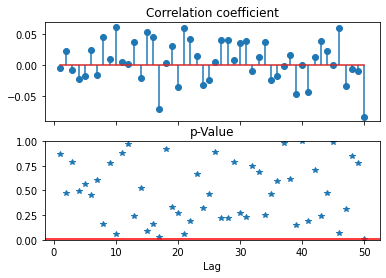

In [14]:
print(pseudo_random_number_generator_test2(SEQUENCE_TEST))

##### Quick check

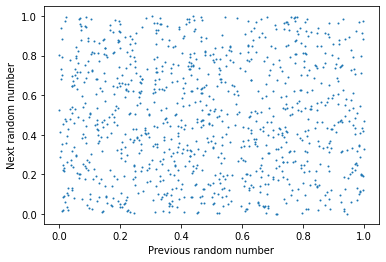

In [15]:
plt.figure()
plt.plot(SEQUENCE_TEST[:-1],SEQUENCE_TEST[1:],'.', markersize=2)
plt.xlabel('Previous random number')
plt.ylabel('Next random number');

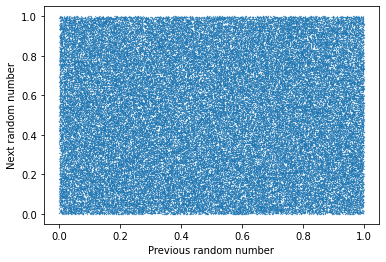

In [16]:
sq2= [pseudo_random_number_generator() for _ in range(100000)]
plt.figure()
plt.plot(sq2[:-1],sq2[1:],'.', markersize=0.5)
plt.xlabel('Previous random number')
plt.ylabel('Next random number');

# Problem 2


## Part 2.1 (2 points)
Implement any method for generating the standard normal distribution. Use your generator from Problem 1 as the source of randomness. Choose the method to adjust the difficulty:
1. Box-Muller and CLT-based approximation -- easy
2. CDF inversion -- medium; you have to explain the approximation you used. Hint: you can easily find many approximations online. Just don't forget to include the reference to the source.
3. Rejection sampling -- medium. Hint: use the Cauchy distribution as proposal. A Cauchy random variable can be easily generated via CDF inversion. You'll have to find $k$ using pen and paper. Hint 2: you can find an exact value of $k$, but a reasonable upper bound will do. Either way, you have to provide a justification for the choice of $k$.

**Descibe the method you implement in the form below**

The Box–Muller transform is commonly expressed in two forms. The basic form as given by Box and Muller takes two samples from the uniform distribution on the interval [0, 1] and maps them to two standard, normally distributed samples.

$Z_0 = Rcos(\theta) = cos(2\pi U_1)\sqrt {-2 ln( U_2 )}$

$Z_1 = Rsin(\theta) = sin(2\pi U_1)\sqrt {-2 ln( U_2 )}$

In [17]:
def generate_normal_random_number():
    x = pseudo_random_number_generator()
    y = pseudo_random_number_generator()
    z1 = np.cos(2*np.pi*y)*np.sqrt(-2*np.log(x))
    z2 = np.sin(2*np.pi*y)*np.sqrt(-2*np.log(x))
    return z1

In [18]:
set_seed(1234)
print(generate_normal_random_number())
print([generate_normal_random_number() for _ in range(7)])

-1.255876718925893
[1.3054273564413597, 0.4323487475203863, -0.4681395041787364, -1.4080766349786578, 1.6321232655238909, -0.7002245263808595, -0.14090322503380728]


## Part 2.2 (2 points)
Show that your generator works -- perform a statistical test to show that the distribution is indeed normal.

**Descibe the test you choose in the form below**

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). 
Statistics:

$KS_t = sup\{F_n(x) - F(x)\}$


In the one-sample case, the distribution considered under the null hypothesis may be continuous. Kolmogorov-Smirnov distribution is used.
<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/KolmogorovDistrPDF.png" />

In [19]:
def normal_random_number_test(sequence):
    x = sequence
    results = stats.kstest(x, 'norm')
    if results[1]<0.05:
        return False
    else:
        return True

In [20]:
set_seed(42)
SEQUENCE_TEST_NORMAL = [generate_normal_random_number() for _ in range(1000)]
print(normal_random_number_test(SEQUENCE_TEST_NORMAL))

True


Text(0.5, 1.0, 'Normal distribution')

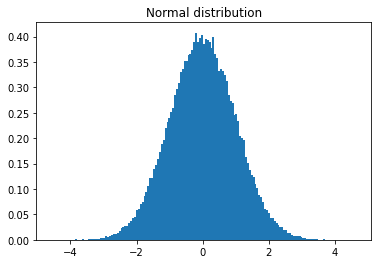

In [21]:
set_seed(42)
SEQUENCE_TEST_NORMAL = [generate_normal_random_number() for _ in range(100000)]
(n, bins, patches) = plt.hist(SEQUENCE_TEST_NORMAL, bins='auto', density=True)
plt.title('Normal distribution')

# Problem 3

## Part 3.1 (1 point)
Use the generator from Problem 2 to write a sampler for the 2-dimensional normal distribution:
\begin{equation}
X\sim N\left(
\begin{pmatrix}
1 \\ 2
\end{pmatrix},\,
\begin{pmatrix}
1 & 2 \\ 2 & 5
\end{pmatrix}
\right)
\end{equation}

Show that your sampler works and the distribution is indeed as required.

In [22]:
def sample_2_dimensional_normal_distribution():
    sigma = np.array([[1, 2], [2, 5]])
    m = np.array([1, 2])
    b = np.linalg.cholesky(sigma)
    x1 = generate_normal_random_number()
    x2 = generate_normal_random_number()
    x_v = np.array([x1, x2])
    y = m + np.dot(b, x_v)
    return y

### Normality test

Here we are testing skewness and kurtosis of the distribution. They should beclose tho the normal one

Skewness = 0

Kurtosis = 3

In [23]:
def norm_test(sample):
    x = stats.mstats.normaltest(sample, axis=0)
    if x[1][0] > 0.05:
        if x[1][0] > 0.05:
            return True
    else:
        return False

In [24]:
set_seed(42)
print(sample_2_dimensional_normal_distribution())

[-2.95738523 -5.98023541]


**Test for closeness to the true answer for covariance matrix and mean values is presented below. Remember that you have to check normality and make other appropriate tests for this problem.**

In [25]:
set_seed(1234)

ARRAY_TEST2 = np.array([sample_2_dimensional_normal_distribution() for _ in range(1000000)]).transpose()
COV_TEST2 = np.cov(ARRAY_TEST2)
TEST2, MESSAGE2 = (np.all(np.isclose(COV_TEST2, np.array([[1, 2], [2, 5]]), atol=1e-01)),
                'Your sampler does not obtain X with required parameters')
assert TEST2, MESSAGE2

In [26]:
set_seed(1234)
ARRAY_TEST1 = np.array([sample_2_dimensional_normal_distribution() for _ in range(1000000)])
norm_test(ARRAY_TEST1)

True

## Part 3.2 (1 point)
Use the generator from Problem 2 to write a sampler for the 3-dimensional normal distribution:
\begin{equation}
X\sim N\left(
\begin{pmatrix}
1 \\ 2 \\ 3
\end{pmatrix},\,
\begin{pmatrix}
4 & 2 & 4 \\ 
2 & 2 & 5 \\ 
4 & 5 & 13
\end{pmatrix}
\right)
\end{equation}

Show that your sampler works and the distribution is indeed as required.

In [27]:
def sample_3_dimensional_normal_distribution():
    sigma3 = np.array([[4, 2, 4], [2, 2, 5], [4, 5, 13]])
    e = 1e-04*np.identity(3) #Newton Algorithm, https://math.stackexchange.com/questions/2946069/what-can-be-added-to-a-non-positive-definite-matrix-to-make-it-positive-definite
    m = np.array([1, 2, 3])
    b = np.linalg.cholesky(sigma3+e)
    x1 = generate_normal_random_number()
    x2 = generate_normal_random_number()
    x3 = generate_normal_random_number()
    x_v = np.array([x1, x2, x3])
    y = m + np.dot(b, x_v)
    return y

In [28]:
sample_3_dimensional_normal_distribution()

array([0.25417119, 1.93083314, 3.15754012])

In [29]:
set_seed(1234)
ARRAY_TEST3 = np.array([sample_2_dimensional_normal_distribution() for _ in range(1000000)])
norm_test(ARRAY_TEST1)

True

In [30]:
set_seed(1234)

ARRAY_TEST3 = np.array([sample_3_dimensional_normal_distribution() for _ in range(1000000)]).transpose()
COV_TEST3 = np.cov(ARRAY_TEST3)
TEST3, MESSAGE3 = (np.all(np.isclose(COV_TEST3, np.array([[4, 2, 4], [2, 2, 5], [4, 5, 13]]), atol=1e-01)),
                'Your sampler does not obtain X with required parameters')
assert TEST3, MESSAGE3